# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Intensidad-de-la-fuente-de-luz" data-toc-modified-id="Intensidad-de-la-fuente-de-luz-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intensidad de la fuente de luz</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Determinación-experimental-de-la-intensidad" data-toc-modified-id="Determinación-experimental-de-la-intensidad-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Determinación experimental de la intensidad</a></div><div class="lev2 toc-item"><a href="#Estabilidad-a-corto-o-largo-plazo" data-toc-modified-id="Estabilidad-a-corto-o-largo-plazo-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Estabilidad a corto o largo plazo</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Intensidad de la fuente de luz

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner ....  de longitud de onda $\lambda$=850 nm (corriente = 329 mA, voltaje = 2.40 V).
1. Lente colimadora ... 
1. Difusor Thorlabs DG10-600-B.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Daca en 60 dB

**Procedimiento**:

Se realizan diversas medidas para el mismo valor y se obtiene un valor medio de la intensidad inicial

**Resultado**

Valor medio de la intensidad de luz de la fuente



In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from __future__ import print_function

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint
from scipy.io import savemat, loadmat

# import hickle as hkl
# from polarimeter.utils import to_bits

## Tarjeta de adquisición de datos

In [5]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [6]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

## Determinación experimental de la intensidad

In [8]:
I0=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=False)
print("I0 = {}".format(I0))

I0 = 3.10716435057


In [10]:
filename="step0_I0_{}".format(datetime.date.today())

np.save(filename+'.npy', np.array([I0]).transpose())
np.savetxt(filename+'.txt', np.array([I0] ).transpose() )
savemat(filename+'.mat', {'I0': I0})

## Estabilidad a corto o largo plazo

In [11]:
ms=1./1000
num_measurements=100
delay_time=100*ms

intensities_0=sp.zeros(num_measurements, dtype=float)
intervals=sp.array(range(num_measurements))*delay_time

for i in range(num_measurements):
    intensities_0[i]=get_intensity(d=d, u=u3, AIN_number=AIN_number,verbose=True)
    time.sleep(delay_time)

3.1072, 3.1020, 3.1072, 3.1020, 3.1072, 3.1072, 3.1072, 3.1072, 3.1020, 3.1072, 3.1020, 3.1072, 3.1020, 3.1020, 3.1072, 3.1123, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1020, 3.1020, 3.1072, 3.1020, 3.1020, 3.1072, 3.1072, 3.1072, 3.1020, 3.1123, 3.1072, 3.1072, 3.1020, 3.1072, 3.1072, 3.1020, 3.1072, 3.1072, 3.1072, 3.1072, 3.1123, 3.1072, 3.1072, 3.1020, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1123, 3.1020, 3.1072, 3.1072, 3.1072, 3.1020, 3.1072, 3.1072, 3.1072, 3.1020, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1072, 3.1020, 3.1072, 3.1072, 3.1020, 3.1020, 3.1020, 3.1072, 3.1020, 3.1072, 3.1020, 3.1072, 3.1072, 3.1020, 3.1020, 3.1072, 3.1020, 3.1072, 3.1072, 3.1072, 3.1072, 3.1020, 

In [12]:
I0=sp.mean(intensities_0)
print("The mean intensity is {:2.4} V".format(I0))

The mean intensity is 3.106 V


In [13]:
filename="step0_stability_corto_{}".format(datetime.date.today())

np.save(filename+'.npy', np.array([intervals, intensities_0]).transpose())
np.savetxt(filename+'.txt', np.array([intervals, intensities_0]).transpose() )
savemat(filename+'.mat', {'intervals': intervals, 'intensities_0': intensities_0})

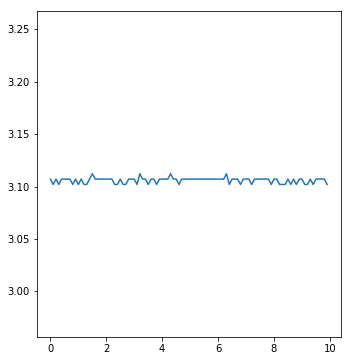

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(intervals, intensities_0)
plt.ylim(intensities_0.max()*0.95,intensities_0.max()*1.05)
plt.savefig('step_0_stability.pdf')

## Resultado

Intensidad inicial sin ningún polarizador, con daca en 60 db, I=0,329 mA, V=2.40 V

**I0=3.106 V**

## Final

In [15]:
LabJackPython.Close()